In [29]:
from sklearn import tree
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

In [30]:
from IPython.display import SVG 
from graphviz import Source
from IPython.display import display

In [31]:
titanic_data = pd.read_csv('train.csv')

In [32]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived 

In [35]:
X = pd.get_dummies(X)

In [36]:
X = X.fillna({'Age': X.Age.median()})

In [37]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [38]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

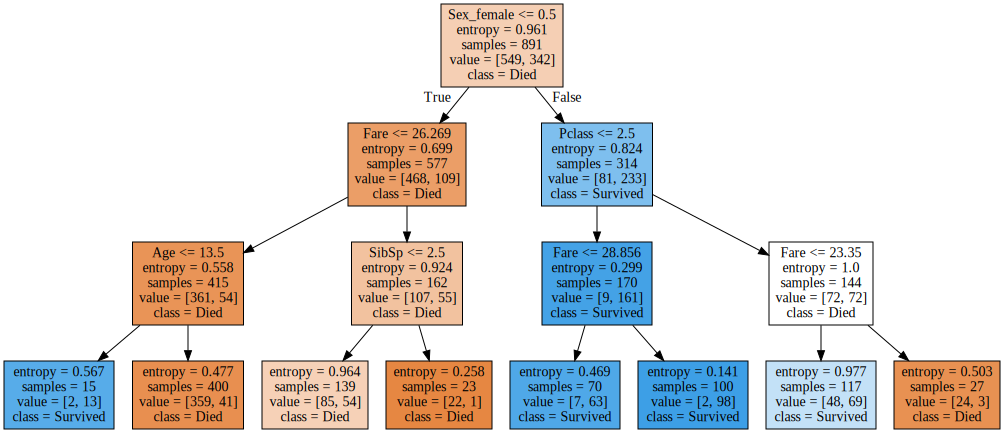

In [39]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
clf.score(X, y)

0.8226711560044894

In [43]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
clf.score(X_train, y_train)

0.8238255033557047

In [45]:
clf.fit(X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
clf.score(X_test, y_test)

0.8169491525423729

In [47]:
max_depth_values = range(1, 100)

In [48]:
scores_data = pd.DataFrame()

In [49]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score]})

    scores_data = scores_data.append(temp_score_data)

In [50]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], var_name='set_type', value_name='score')

In [51]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

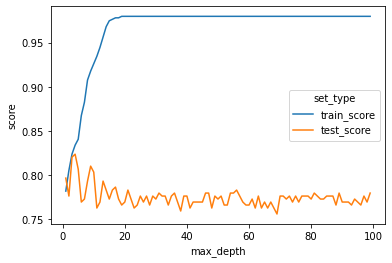

In [52]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [53]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [58]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [59]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [60]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [ ]:
grid_search_cv_clf.best_params_